In [1]:
from camminapy import *
import sphericalquadpy
from scipy.special import sph_harm


Bad key "text.kerning_factor" on line 4 in
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Fixed order, variable SPH degree

In [6]:
quadconstructor = sphericalquadpy.gausslegendre.GaussLegendre
quadname ="Gauss-Legendre"

#quadconstructor = sphericalquadpy.levelsymmetric.Levelsymmetric
#quadname ="Level-symmetric"


#quadconstructor = sphericalquadpy.montecarlo.MonteCarlo
order = 20
quad = quadconstructor(order=order)

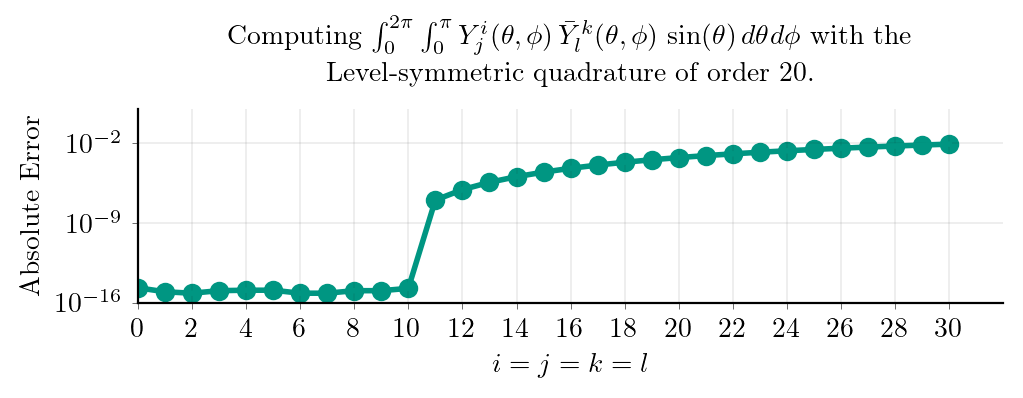

In [4]:
nerrs = 30+1
errors = np.zeros(nerrs)
plt.style.use("kitish")
for n in range(nerrs):
    i=j=k=l=n
    def f(x, y, z):
        return sphericalquadpy.tools.ylm(i,j,x,y,z)*np.conj(sphericalquadpy.tools.ylm(k,l,x,y,z))
    result  = quad.integrate(f)
    resultreal = np.real(result)
    errors[n] = resultreal- 1.0

fig, ax = plt.subplots()
ax.semilogy(range(nerrs),np.abs(errors))
ax.scatter(range(nerrs),np.abs(errors))

ax.set_xticks(np.arange(0,nerrs+1,2))
ax.set_xticklabels(np.arange(0,nerrs+1,2))
ax.set_ylim([1e-16,10])
ax.set_xlim([0,32])
ax.set_xlabel(r"$i=j=k=l$")
ax.set_ylabel("Absolute Error")
ax.set_title(r"Computing $ \int_0^{2\pi}\int_0^\pi Y^i_j(\theta,\phi) \,  \bar Y^k_l(\theta,\phi) \, \sin(\theta) \, d \theta d\phi$ with the"+"\n"+quadname+" quadrature of order "+"{}.".format(order))
plt.savefig("{}_fixedorder.pdf".format(quadname))

# Fixed degree, variable order

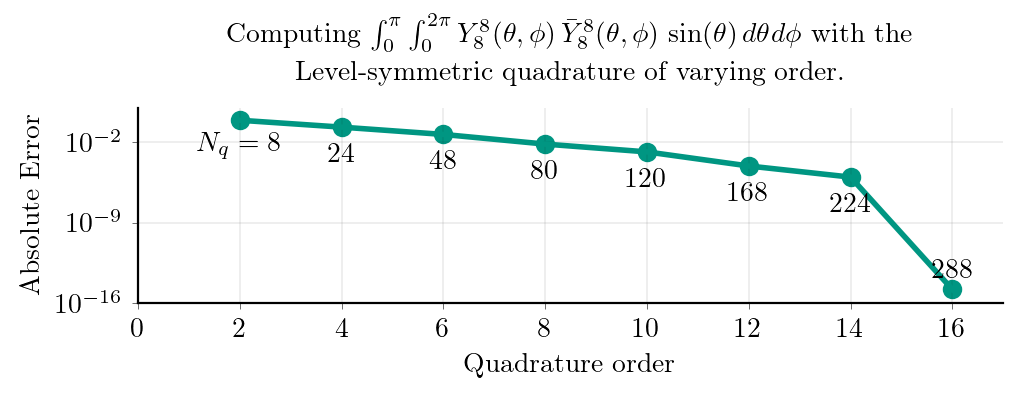

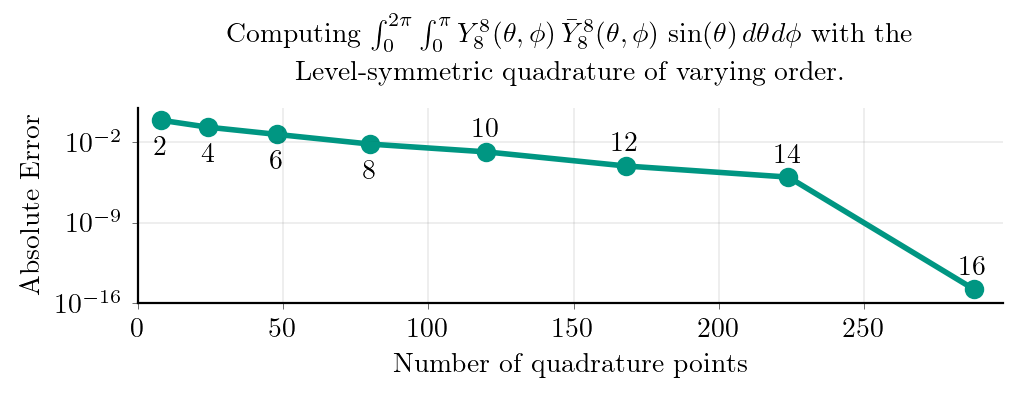

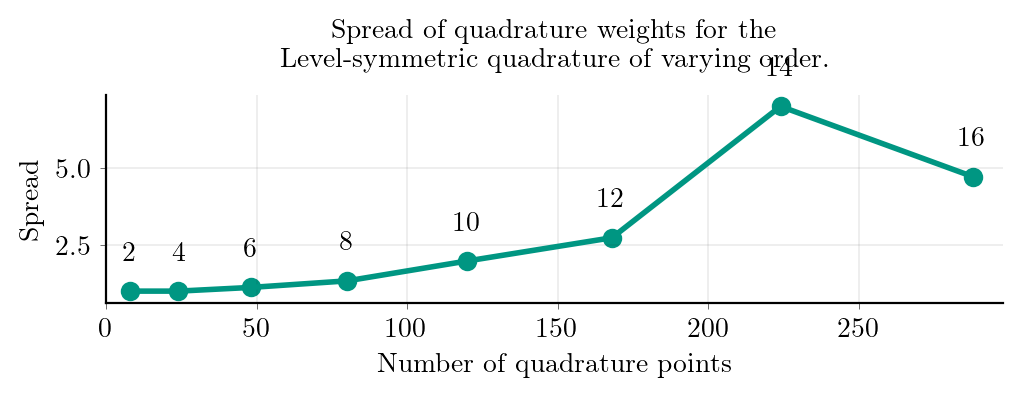

In [5]:

n = 8
norders = 16+1
orders = np.arange(2,norders,2)
errors = np.zeros(len(orders))
nqs = np.zeros(len(orders))
weightvar = np.zeros(len(orders))
plt.style.use("kitish")
for pos,order in enumerate(orders):
    quad = quadconstructor(order=order)

    i=j=k=l=n
    def f(x, y, z):
        return sphericalquadpy.tools.ylm(i,j,x,y,z)*np.conj(sphericalquadpy.tools.ylm(k,l,x,y,z))
    result  = quad.integrate(f)
    resultreal = np.real(result)
    errors[pos] = resultreal- 1.0
    nqs[pos] = len(quad.weights)
    weightvar[pos] = np.max(quad.weights)/np.min(quad.weights)#np.var(quad.weights)

fig, ax = plt.subplots()
ax.semilogy(orders,np.abs(errors))
ax.scatter(orders,np.abs(errors))
for order,nq,err in zip(orders,nqs,np.abs(errors)):
    if order == 2:
        ax.text(order,err*0.001,"$N_q={}$".format(int(nq)),horizontalalignment="center")
    else:
        if order <2*n:
            ax.text(order,err*0.001,"${}$".format(int(nq)),horizontalalignment="center")
        else:
            ax.text(order,err*10,"${}$".format(int(nq)),horizontalalignment="center")
    

ax.set_xlim([0,np.max(orders)+1])
ax.set_xticks(np.arange(0,norders+1,2))
ax.set_xticklabels(np.arange(0,norders+1,2))
ax.set_ylim([1e-16,10])
ax.set_xlabel(r"Quadrature order")
ax.set_ylabel("Absolute Error")
text1 = "Y^{}_{}".format(n,n)
ax.set_title(r"Computing $\int_0^\pi \int_0^{2\pi} Y^{8}_{8}(\theta,\phi) \,  \bar Y^{8}_{8}(\theta,\phi) \, \sin(\theta) \, d \theta d\phi$ with the"+"\n"+quadname+" quadrature of varying order.")
plt.savefig("{}_fixeddegree.pdf".format(quadname))

import kitcolors as kit 

fig, ax = plt.subplots()
ax.semilogy(nqs,np.abs(errors),color = kit.green)
ax.scatter(nqs,np.abs(errors),color = kit.green)
for order,nq,err in zip(orders,nqs,np.abs(errors)):
    if order == 20:
        ax.text(nq,err*20,"Order $={}$".format(int(order)),horizontalalignment="center")
    else:
        if order <10:
            ax.text(nq,err*0.001,"${}$".format(int(order)),horizontalalignment="center")
        else:
            ax.text(nq,err*20,"${}$".format(int(order)),horizontalalignment="center")
    
ax.set_xlim([0,np.max(nqs)+10])
#ax.set_xticks(np.arange(0,norders+1,2))
#ax.set_xticklabels(np.arange(0,norders+1,2))
ax.set_ylim([1e-16,10])
ax.set_xlabel(r"Number of quadrature points")
ax.set_ylabel("Absolute Error")
text1 = "Y^{}_{}".format(n,n)
ax.set_title(r"Computing $ \int_0^{2\pi}\int_0^\pi Y^{8}_{8}(\theta,\phi) \,  \bar Y^{8}_{8}(\theta,\phi) \, \sin(\theta) \, d \theta d\phi$ with the"+"\n"+quadname+" quadrature of varying order.")
plt.savefig("{}_fixeddegreenq.pdf".format(quadname))


fig, ax = plt.subplots()
ax.plot(nqs,weightvar,color = kit.green)
ax.scatter(nqs,weightvar,color = kit.green)
ax.set_xlabel("Number of quadrature points")
ax.set_ylabel("Spread")
ax.set_xlim([0,np.max(nqs)+10])
ax.set_title("Spread of quadrature weights for the\n {} quadrature of varying order.".format(quadname))

for order,nq,err in zip(orders,nqs,1
                    * np.abs(weightvar)):
    if order == 20:
        ax.text(nq,err-1.500011,"Order $={}$".format(int(order)),horizontalalignment="center")
    else:
        if order <19:
            ax.text(nq,err+1.000051,"${}$".format(int(order)),horizontalalignment="center")#,color=kit.orange)
        else:
            ax.text(nq,err-+1.500011,"${}$".format(int(order)),horizontalalignment="center")#,color=kit.orange)
plt.savefig("{}_weightratio.pdf".format(quadname))

/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


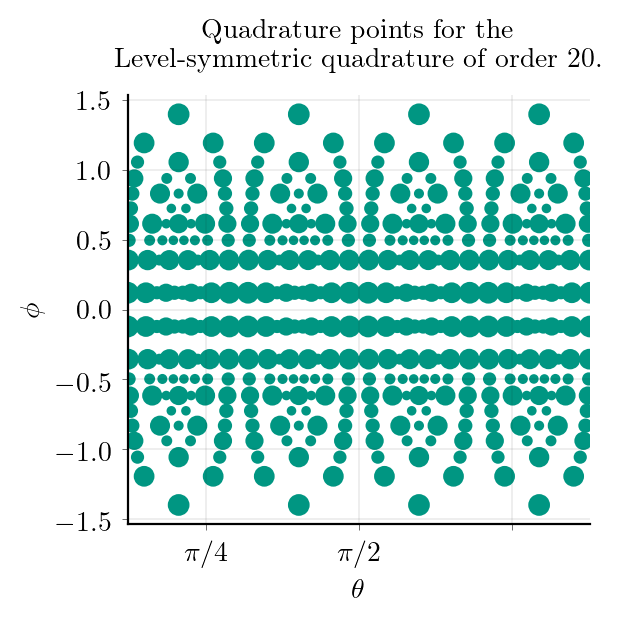

In [65]:
order = 20
quad = quadconstructor(order=order)
n = len(quad.weights)
xyz = quad.xyz[:n//1,:]
w = quad.weights[:n//1]
thetaphi = sphericalquadpy.tools.xyz2thetaphi(xyz)
theta,phi = thetaphi[:,0],np.pi/2- thetaphi[:,1]

fig, ax = plt.subplots(1,1,figsize=(3,3),constrained_layout=True)
ax.scatter(theta,phi,s =800*w  )
#ax.set_ylim([0,np.pi/2])#,np.pi])
#ax.set_xlim([0,np.pi/2])#-np.pi,2*np.pi])

#ax.set_xticks([0,np.pi/4,np.pi/2])
#ax.set_yticks([0,np.pi/4,np.pi/2])
#


























ax.set_xticklabels([r"0",r"$\pi/4$",r"$\pi/2$"])
#ax.set_yticklabels([r"0",r"$\pi/4$",r"$\pi/2$"])
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\phi$")
ax.set_title("Quadrature points  for the \n {} quadrature of order {}.".format(quadname,order))
#plt.tight_layout()
plt.savefig("{}_points.png".format(quadname))


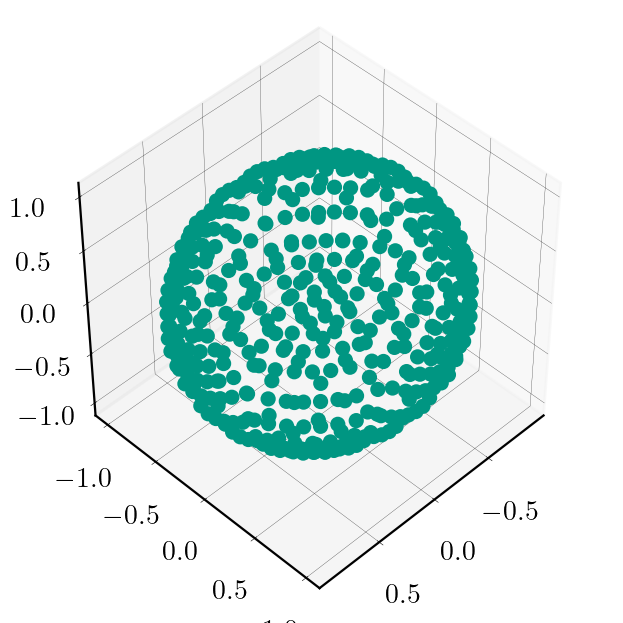

In [66]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],alpha = 1)
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')
#ax.set_xticks([0.5,1])
#ax.set_yticks([0.5,1])
#ax.set_zticks([0.5,1])

#ax.set_xlim([0,1.01])
#ax.set_zlim([0,1.01])
#ax.set_ylim([0,1.01])
#ax.set_ymargin(0)
#ax.set_xmargin(0)
#ax.set_zmargin(0)

ax.view_init(elev=45, azim=45)
plt.show()

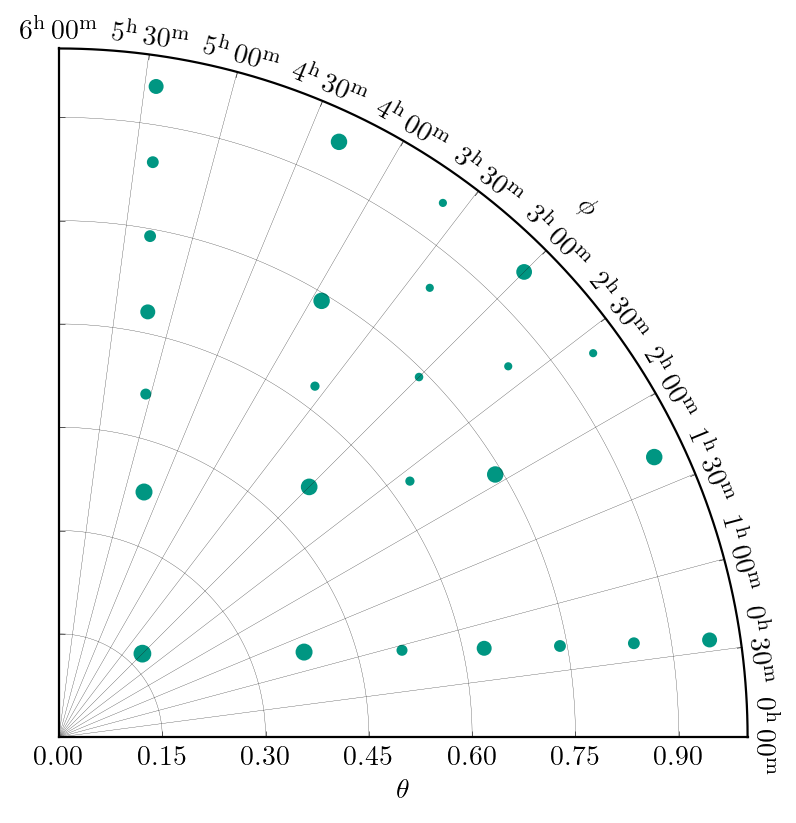

In [67]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(0, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(12)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(7)

    # Specify theta limits in degrees
    ra0, ra1 = 0, 90# 8.*15, 14.*15
    # Specify radial limits
    cz0, cz1 = 0, 1
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"$\theta$")
    ax1.axis["top"].label.set_text(r"$\phi$")
    ax1.set_xticks([0,1])

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


fig = plt.figure(figsize=(4, 4))
ax, aux_ax = setup_axes3(fig, 111)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.

x,y = np.array([0,1,2])*40, 30*np.array([1,1,1])
#aux_ax.scatter(y,x)
theta,phi = thetaphi[:,0], thetaphi[:,1]


aux_ax.scatter( 1*theta*360/2/np.pi,#-np.pi/4*180,
               (phi),s=w*500)
plt.show()


In [38]:
thetaphi.reshape(thetaphi.size)

array([0.17042426, 1.40279449, 0.18940042, 1.09331053, 0.21656038,
       0.89179124, 0.26021717, 0.70745088, 0.34897168, 0.51097005,
       0.78539816, 0.23873573, 0.4848889 , 1.40279449, 0.5438325 ,
       1.09331053, 0.6317129 , 0.89179124, 0.78539816, 0.70745088,
       1.22182465, 0.51097005, 0.69058381, 1.40279449, 0.78539816,
       1.09331053, 0.93908343, 0.89179124, 1.31057916, 0.70745088,
       0.88021252, 1.40279449, 1.02696383, 1.09331053, 1.35423594,
       0.89179124, 1.08590743, 1.40279449, 1.38139591, 1.09331053,
       1.40037206, 1.40279449])

In [39]:
thetaphi[:,1]

array([1.40279449, 1.09331053, 0.89179124, 0.70745088, 0.51097005,
       0.23873573, 1.40279449, 1.09331053, 0.89179124, 0.70745088,
       0.51097005, 1.40279449, 1.09331053, 0.89179124, 0.70745088,
       1.40279449, 1.09331053, 0.89179124, 1.40279449, 1.09331053,
       1.40279449])

In [139]:
quadconstructor = sphericalquadpy.levelsymmetric.Levelsymmetric
#quadconstructor = sphericalquadpy.octalerp.Octalerp
order = 16
quad = quadconstructor(order=order)
n = len(quad.weights)
xyz = quad.xyz[:n//8,:]
w = quad.weights[:n//8]
print(np.unique(xyz[:,1]))
print(np.unique(w/sum(w)))


[0.13895688 0.39228926 0.53709656 0.65042645 0.74675057 0.83199656
 0.9092855  0.98050088]
[0.01037696 0.0135295  0.0203032  0.02655008 0.03263694 0.03790744
 0.0413296  0.04898724]


In [70]:
w

array([ 0.05815253,  0.05228273,  0.01755192,  0.03851239,  0.02135094,
        0.02135094,  0.03851239,  0.01755192,  0.05228273,  0.05815253,
        0.05228273,  0.04995589,  0.01076769,  0.0483971 , -0.0002191 ,
        0.0483971 ,  0.01076769,  0.04995589,  0.05228273,  0.01755192,
        0.01076769,  0.00855574,  0.00745444,  0.00745444,  0.00855574,
        0.01076769,  0.01755192,  0.03851239,  0.0483971 ,  0.00745444,
        0.04355795,  0.00745444,  0.0483971 ,  0.03851239,  0.02135094,
       -0.0002191 ,  0.00745444,  0.00745444, -0.0002191 ,  0.02135094,
        0.02135094,  0.0483971 ,  0.00855574,  0.0483971 ,  0.02135094,
        0.03851239,  0.01076769,  0.01076769,  0.03851239,  0.01755192,
        0.04995589,  0.01755192,  0.05228273,  0.05228273,  0.05815253,
        0.05815253,  0.05228273,  0.01755192,  0.03851239,  0.02135094,
        0.02135094,  0.03851239,  0.01755192,  0.05228273,  0.05815253,
        0.05228273,  0.04995589,  0.01076769,  0.0483971 , -0.00